In [68]:
#Loan Prediction Analysis
#by Group-14

#Animesh Kumar - 09
#Robin Kumar   - 39
#Samrat Ghorai - 44

## IMPORT MODULES:

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## LOADING THE DATASET: 

In [ ]:
df = pd.read_csv('/content/sample_data/Loan data.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## PREPROCESSING THE DATASET

In [ ]:
#Null values:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#filling the missing values for numerical terms with the help of mean
df ['LoanAmount'] = df ['LoanAmount'].fillna(df['LoanAmount'].mean())
df ['Loan_Amount_Term'] = df ['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df ['Credit_History'] = df ['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
#filling the missing values for categorical terms with the help of mode
df ['Gender'] = df ['Gender'].fillna(df['Gender'].mode()[0])
df ['Married'] = df ['Married'].fillna(df['Married'].mode()[0])
df ['Dependents'] = df ['Dependents'].fillna(df['Dependents'].mode()[0])
df ['Self_Employed'] = df ['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## EXPLORATORY DATA ANALYSIS:

##### CATEGORICAL ATTRIBUTE VISUALIZATION:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


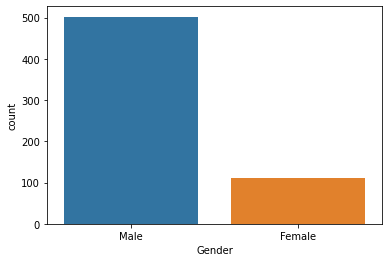

In [ ]:
sns.countplot(df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


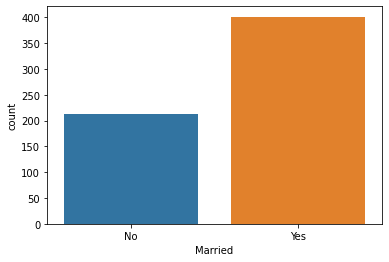

In [ ]:
sns.countplot(df['Married'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


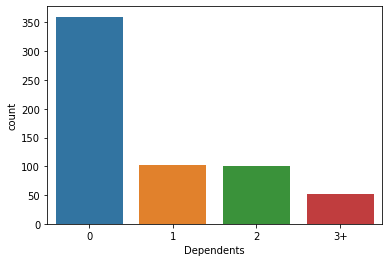

In [ ]:
sns.countplot(df['Dependents'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


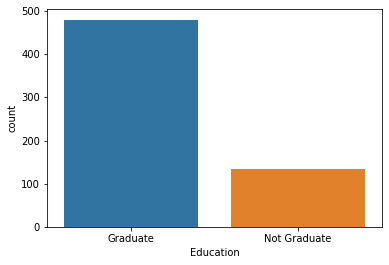

In [ ]:
sns.countplot(df['Education'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


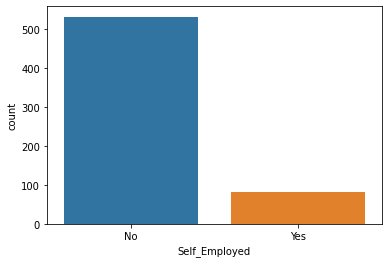

In [ ]:
sns.countplot(df['Self_Employed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


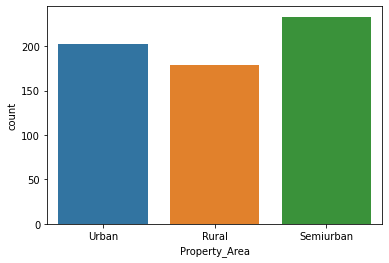

In [ ]:
sns.countplot(df['Property_Area'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


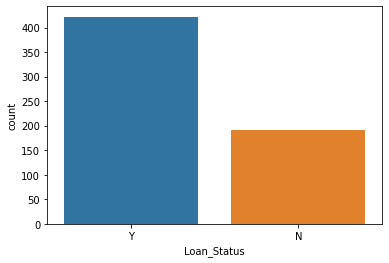

In [ ]:
sns.countplot(df['Loan_Status'])

##### NUMERICAL ATTRIBUTE VISUALIZATION:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


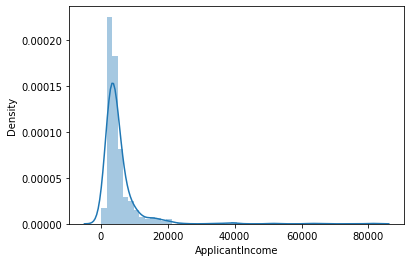

In [ ]:
sns.distplot(df['ApplicantIncome'])

In [ ]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


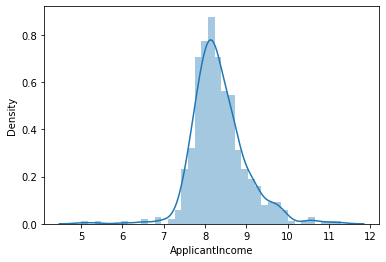

In [ ]:
sns.distplot(df['ApplicantIncome'])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,141.000000,360.0,1.0,Urban,Y


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


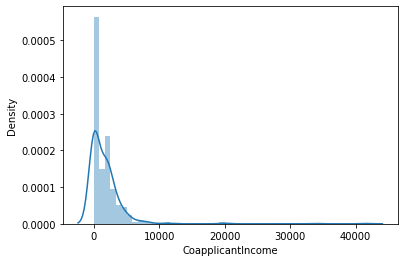

In [ ]:
sns.distplot(df['CoapplicantIncome'])

In [ ]:
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome']+1)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,2.118566,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2.170880,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,141.000000,360.0,1.0,Urban,Y


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


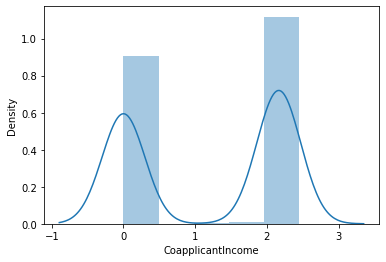

In [ ]:
sns.distplot(df['CoapplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


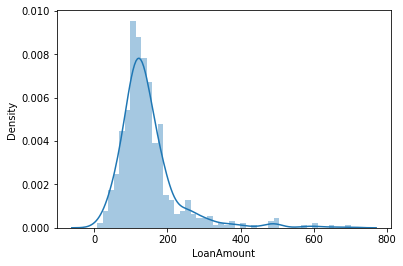

In [ ]:
sns.distplot(df['LoanAmount'])

In [ ]:
df['LoanAmount'] = np.log(df['LoanAmount'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


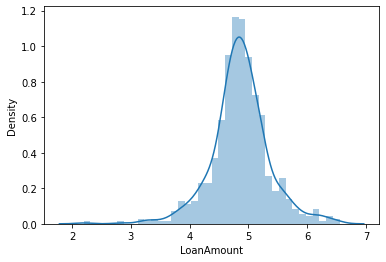

In [ ]:
sns.distplot(df['LoanAmount'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


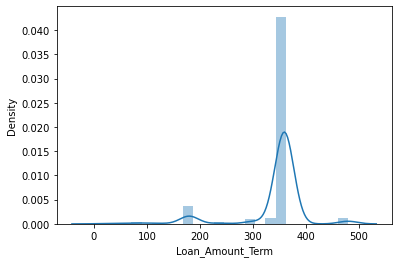

In [ ]:
sns.distplot(df['Loan_Amount_Term'])

In [ ]:
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


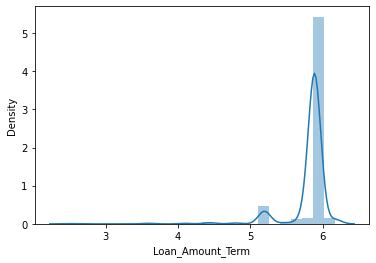

In [ ]:
sns.distplot(df['Loan_Amount_Term'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


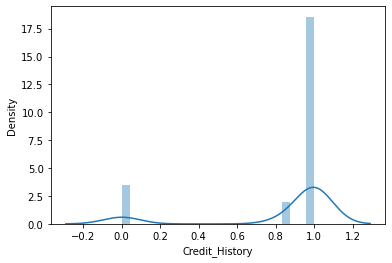

In [ ]:
sns.distplot(df['Credit_History'])

## CREATING NEW ATTRIBUTES:

In [ ]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,4.986426,5.886104,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.319202,4.852030,5.886104,1.0,Rural,N,15.749312
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,5.886104,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765993,4.787492,5.886104,1.0,Urban,Y,15.622700
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,5.886104,1.0,Urban,Y,8.699515


## LOG TRANSFORMATION:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


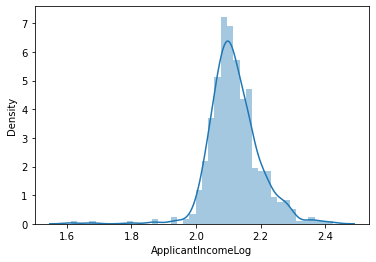

In [ ]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


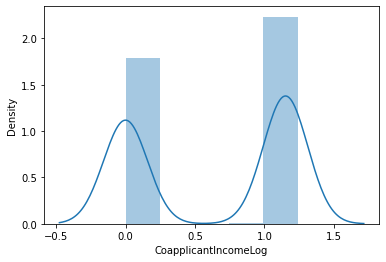

In [ ]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df['CoapplicantIncomeLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


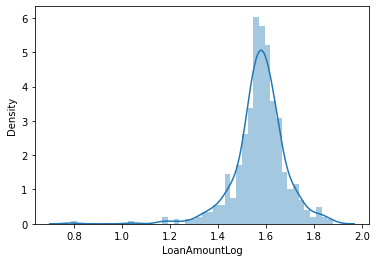

In [ ]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


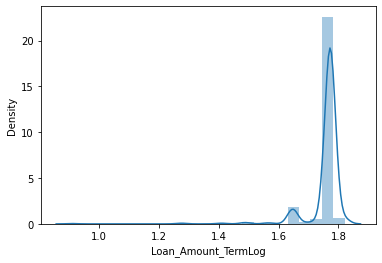

In [ ]:
df['Loan_Amount_TermLog'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_TermLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


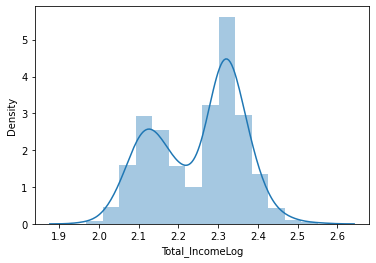

In [ ]:
df['Total_IncomeLog'] = np.log(df['Total_Income'])
sns.distplot(df['Total_IncomeLog'])

## CORRELATION MATRIX:

In [ ]:
corr = df.corr()

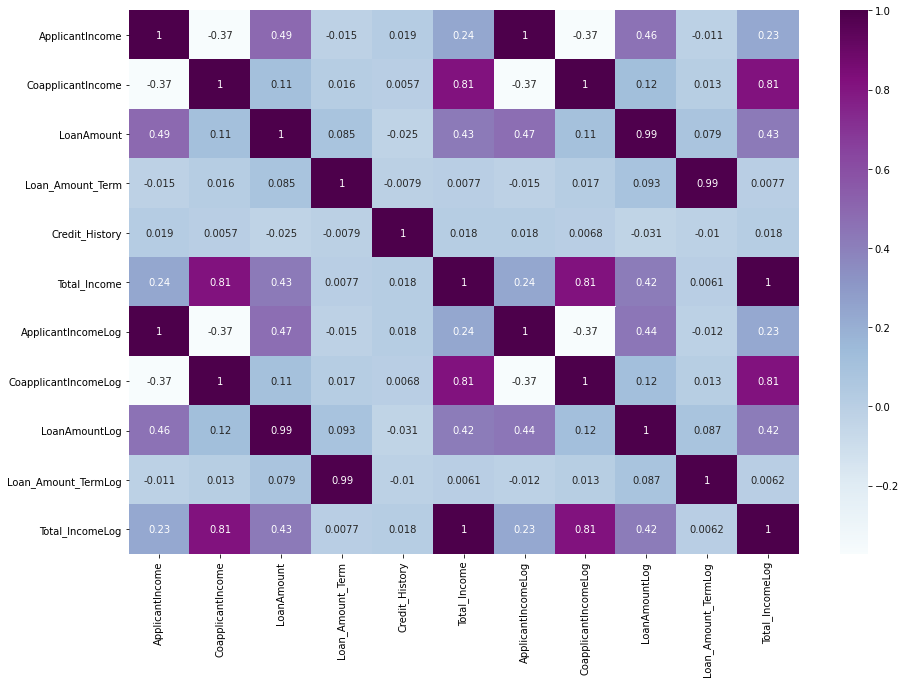

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="BuPu")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,4.986426,5.886104,1.0,Urban,Y,8.674026,2.160333,0.000000,1.606719,1.772594,2.160333
1,LP001003,Male,Yes,1,Graduate,No,8.430109,2.118566,4.852030,5.886104,1.0,Rural,N,10.548675,2.131810,1.137373,1.579397,1.772594,2.356000
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,5.886104,1.0,Urban,Y,8.006368,2.080237,0.000000,1.432618,1.772594,2.080237
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2.170880,4.787492,5.886104,1.0,Urban,Y,10.027587,2.061368,1.154009,1.566007,1.772594,2.305340
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,5.886104,1.0,Urban,Y,8.699515,2.163267,0.000000,1.599137,1.772594,2.163267


In [ ]:
## drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' ,'Loan_Amount_Term','Total_Income','Loan_ID','CoapplicantIncomeLog']
df = df.drop(columns = cols , axis = 1)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,2.160333,1.606719,1.772594,2.160333
1,Male,Yes,1,Graduate,No,1.0,Rural,N,2.131810,1.579397,1.772594,2.356000
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,2.080237,1.432618,1.772594,2.080237
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,2.061368,1.566007,1.772594,2.305340
4,Male,No,0,Graduate,No,1.0,Urban,Y,2.163267,1.599137,1.772594,2.163267


## LABEL ENCODING:

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols :
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,1,0,0,0,0,1.0,2,1,2.160333,1.606719,1.772594,2.160333
1,1,1,1,0,0,1.0,0,0,2.131810,1.579397,1.772594,2.356000
2,1,1,0,0,1,1.0,2,1,2.080237,1.432618,1.772594,2.080237
3,1,1,0,1,0,1.0,2,1,2.061368,1.566007,1.772594,2.305340
4,1,0,0,0,0,1.0,2,1,2.163267,1.599137,1.772594,2.163267


## TRAIN-TEST SPLIT:

In [ ]:
X = df.drop(columns = ['Loan_Status'],axis =1)

In [ ]:
y = df['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## MODEL TRAINING:

In [ ]:
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy is ", model.score(x_test,y_test)*100)
    score=cross_val_score(model,x,y,cv=5)
    print("Cross validation is ," ,np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

Accuracy is  77.27272727272727
Cross validation is , 80.9462881514061


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
classify(model,X,y)

Accuracy is  70.12987012987013
Cross validation is , 73.4599493535919


In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,X,y)

Accuracy is  75.97402597402598
Cross validation is , 80.45981607357058


In [ ]:
model = ExtraTreesClassifier()
classify(model,X,y)

Accuracy is  74.67532467532467
Cross validation is , 78.50459816073571


## HYPERPARAMETER TUNING:

In [ ]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7,max_features=1)
classify(model, X,y)

Accuracy is  76.62337662337663
Cross validation is , 80.12794882047181


In [ ]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm = confusion_matrix(y_pred,y_test)

In [ ]:
cm

array([[24,  5],
       [30, 95]])

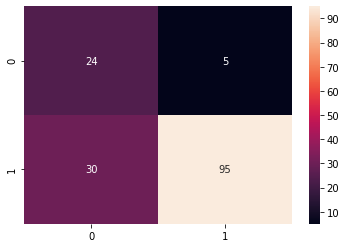

In [ ]:
sns.heatmap(cm,annot=True)